In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import preprocessing

# TRAIN

In [2]:
for i in range(45):
    if i==0:
        train = pd.read_csv('salida/resultados/SICK/TRAIN_'+str(i+1)+'.csv.csv')
    else:
        temp = pd.read_csv('salida/resultados/SICK/TRAIN_'+str(i+1)+'.csv.csv')
        train=pd.concat([train,temp])

In [3]:
#train["suma"]=train["suma"]+train["antonimos"]

<Axes: title={'center': 'suma'}, xlabel='CLASS'>

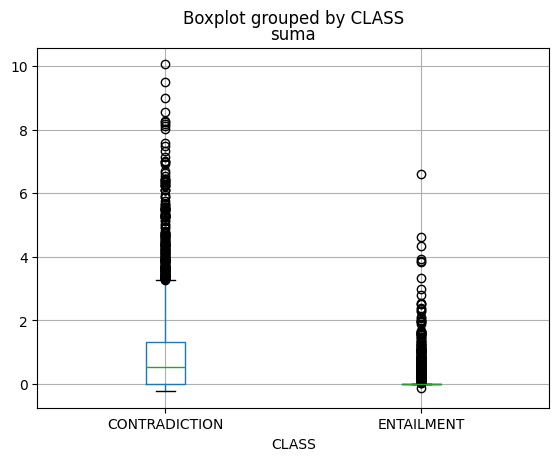

In [4]:
train.boxplot(by="CLASS",column=["suma"])

<Axes: title={'center': 'suma'}, xlabel='CLASS'>

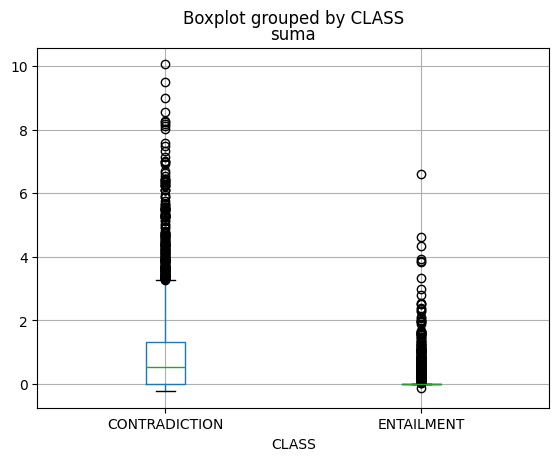

In [5]:
train.boxplot(by="CLASS",column=["suma"])

In [6]:
train=train.drop(["entropias","antonimos"],axis=1)
train

,suma,distancias,mutual_info,m_earth,max_info_p,relaciones,sim_faltantes,CLASS
0,0.000000,0.00000,0.000000,0.000000,0.000000,1,1.000000,CONTRADICTION
1,0.114918,100.71223,1.711384,0.369471,0.114918,1,0.114918,CONTRADICTION
2,0.000000,0.00000,0.000000,0.000000,0.000000,1,1.000000,ENTAILMENT
3,1.064229,380.85742,18.322292,4.431219,0.195273,0,0.177042,CONTRADICTION
4,2.867368,241.05775,20.902023,4.989589,0.332594,2,0.471261,CONTRADICTION
...,...,...,...,...,...,...,...,...
34,0.924950,391.77950,18.350202,4.146894,0.135612,0,0.177094,CONTRADICTION
35,2.549616,343.11250,29.332251,5.025132,0.363223,0,0.407879,CONTRADICTION
36,3.173033,369.60180,34.950960,6.838347,0.257784,1,0.398060,CONTRADICTION
37,1.804459,204.06305,14.874765,3.171687,0.401213,0,0.369778,CONTRADICTION


In [7]:
X = np.array(train.drop(['CLASS'],axis=1))
y_ = np.array(train['CLASS'])

In [8]:
# SICK
y_train=[]
for i in y_:
    if i == "ENTAILMENT":
        y_train.append(1)
    else:
        y_train.append(0)

In [9]:
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X = X_scaled
X_train=X

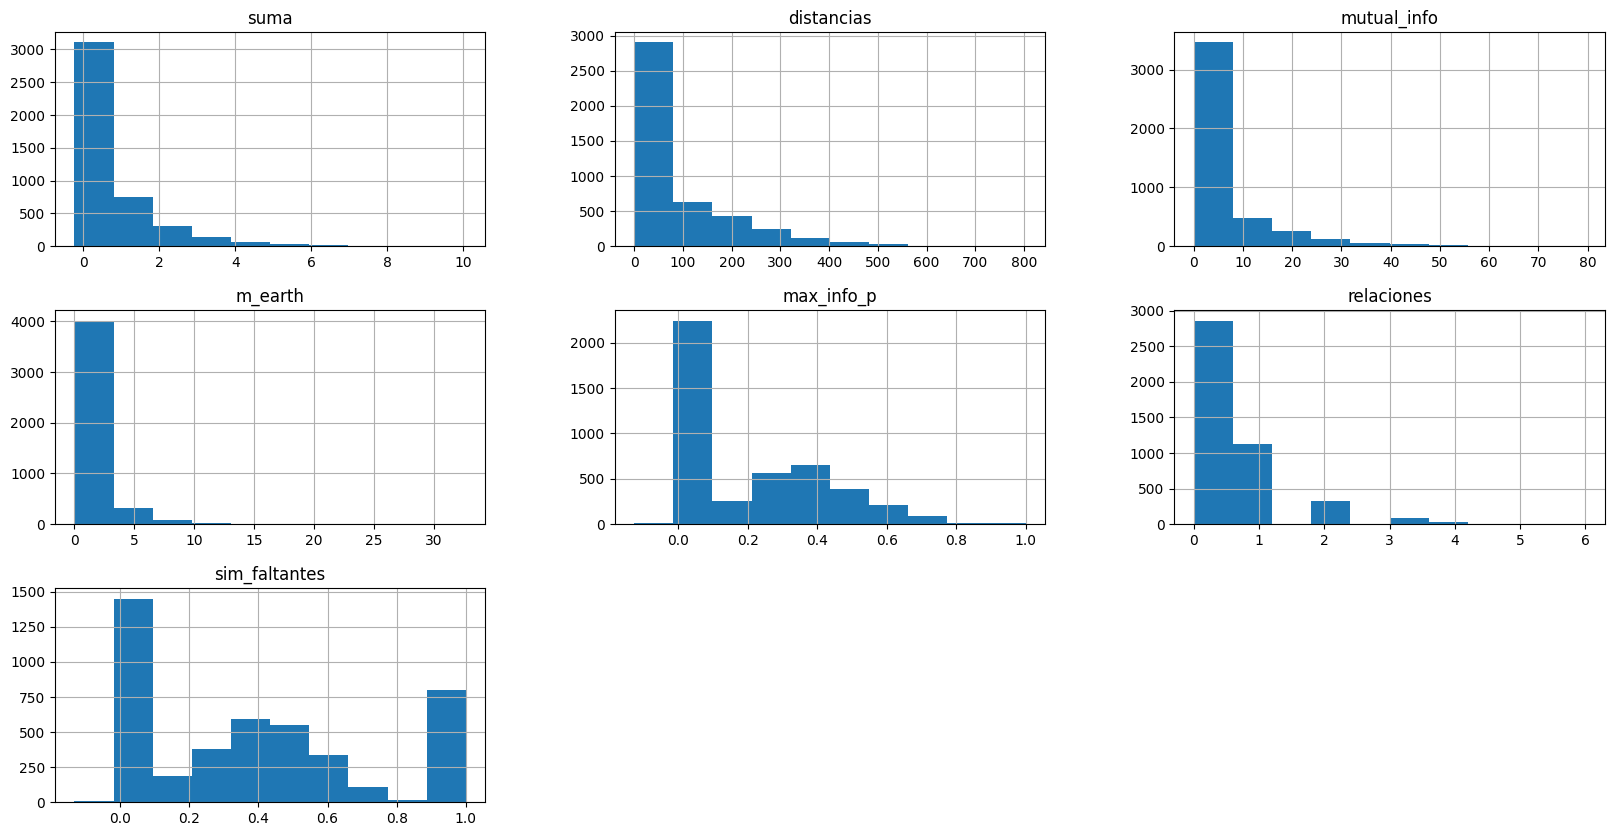

In [10]:
train.hist(figsize=(20,10))
plt.show()

# DEV

In [11]:
for i in range(5):
    if i==0:
        dev = pd.read_csv('salida/resultados/SICK/DEV_'+str(i+1)+'.csv.csv')
    else:
        temp = pd.read_csv('salida/resultados/SICK/DEV_'+str(i+1)+'.csv.csv')
        dev=pd.concat([dev,temp])

In [12]:
#dev["suma"]=dev["suma"]+dev["antonimos"]

In [13]:
dev=dev.drop(["entropias","antonimos"],axis=1)
dev

,suma,distancias,mutual_info,m_earth,max_info_p,relaciones,sim_faltantes,CLASS
0,1.074424,127.826540,6.906301,1.720222,0.278522,0,0.352328,CONTRADICTION
1,2.011933,193.265750,15.422091,2.632271,0.296344,2,0.458316,CONTRADICTION
2,0.378545,60.185406,1.897469,0.247676,0.378545,1,0.378546,CONTRADICTION
3,1.660813,270.395660,7.607406,1.297392,0.415203,2,0.538831,CONTRADICTION
4,0.000000,0.000000,0.000000,0.000000,0.000000,0,1.000000,CONTRADICTION
...,...,...,...,...,...,...,...,...
90,0.986909,156.993200,10.616691,2.130698,0.199834,1,0.287339,CONTRADICTION
91,0.302330,73.981760,3.260589,0.495572,0.404658,0,0.260126,CONTRADICTION
92,1.608502,277.959170,21.247575,3.813996,0.197763,0,0.246701,CONTRADICTION
93,0.595234,170.758440,6.351086,1.874976,0.205298,2,0.162272,CONTRADICTION


In [14]:
X_dev = np.array(dev.drop(['CLASS'],axis=1))
y_d = np.array(dev['CLASS'])

In [15]:
# SICK
y_dev=[]
for i in y_d:
    if i == "ENTAILMENT":
        y_dev.append(1)
    else:
        y_dev.append(0)

In [16]:
scaler = preprocessing.StandardScaler().fit(X_dev)
X_scaled = scaler.transform(X_dev)
X_dev = X_scaled

# TEST

In [17]:
for i in range(50):
    if i==0:
        test = pd.read_csv('salida/resultados/SICK/TEST_'+str(i+1)+'.csv.csv')
    else:
        temp = pd.read_csv('salida/resultados/SICK/TEST_'+str(i+1)+'.csv.csv')
        test=pd.concat([test,temp])

In [18]:
#test["suma"]=test["suma"]+test["antonimos"]

In [19]:
test=test.drop(["entropias","antonimos"],axis=1)
test

,suma,distancias,mutual_info,m_earth,max_info_p,relaciones,sim_faltantes,CLASS
0,4.966659,348.627660,34.533986,7.224745,0.313013,1,0.428688,CONTRADICTION
1,3.762295,322.391720,28.020195,6.795347,0.368469,0,0.487296,CONTRADICTION
2,4.527484,188.073120,26.025844,5.007468,0.459162,1,0.580983,CONTRADICTION
3,0.000000,0.000000,0.000000,0.000000,0.000000,0,1.000000,ENTAILMENT
4,0.473630,45.112247,1.714587,0.262647,0.473630,0,0.473630,CONTRADICTION
...,...,...,...,...,...,...,...,...
1,2.238598,195.129700,22.072410,2.996832,0.368855,1,0.342264,CONTRADICTION
2,0.748086,172.961210,10.085201,3.234199,0.248313,1,0.210610,CONTRADICTION
3,0.536706,162.101380,5.211209,0.640615,0.178902,3,0.212080,CONTRADICTION
4,8.014608,545.806150,62.260364,12.531210,0.420467,2,0.568003,CONTRADICTION


In [20]:
X_t = np.array(test.drop(['CLASS'],axis=1))
y_t = np.array(test['CLASS'])

In [21]:
# SICK
y_test=[]
for i in y_t:
    if i == "ENTAILMENT":
        y_test.append(1)
    else:
        y_test.append(0)

In [22]:
scaler = preprocessing.StandardScaler().fit(X_t)
X_scaled = scaler.transform(X_t)
X_test = X_scaled

# MODELO DE REGRESIÓN LÓGISTICA

In [23]:
model = linear_model.LogisticRegression(penalty="l2", C=1)
model.fit(X_train,y_train)

LogisticRegression(C=1)

In [24]:
model.get_params()

{'C': 1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [25]:
model.decision_function(X)

array([-0.41292048, -1.98763958, -0.41292048, ..., -5.0982134 ,
       -2.93630869, -3.41430518])

In [26]:
labels=train.columns[:-1]
labels

Index(['suma', 'distancias', 'mutual_info', 'm_earth', 'max_info_p',
       'relaciones', 'sim_faltantes'],
      dtype='object')

In [27]:
model.classes_

array([0, 1])

In [28]:
model.coef_[0]

array([ 0.4273449 , -1.55354221, -0.11684581,  0.03414511, -0.47301083,
       -0.44601248,  0.00282554])

In [29]:
coeficientes=model.coef_[0]

In [30]:
print("Maximo,minimo ",np.argmax(coeficientes),labels[np.argmax(coeficientes)],np.argmin(coeficientes),labels[np.argmin(coeficientes)])

Maximo,minimo  0 suma 1 distancias


In [31]:
n_columns=train.shape[1]-1

In [32]:
n_columns

7

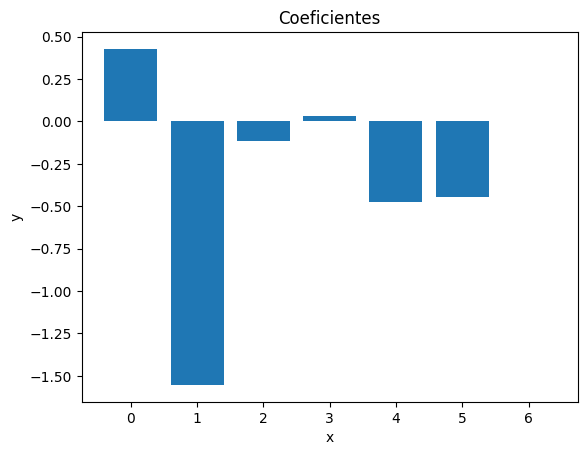

In [33]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,n_columns,1)
y_v = coeficientes

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Coeficientes')
plt.show()

In [34]:
predictions = model.predict(X_dev)

In [35]:
print(confusion_matrix(y_dev, predictions))

[[279  73]
 [ 51  92]]


In [36]:
print(confusion_matrix(y_dev, predictions))

[[279  73]
 [ 51  92]]


In [37]:
print("acccuracy: ",round(accuracy_score(y_dev,predictions),2))
print("precision: ",round(precision_score(y_dev,predictions),2))
print("recall",round(recall_score(y_dev,predictions),2))
print("f1_score: ",round(f1_score(y_dev,predictions),2))

acccuracy:  0.75
precision:  0.56
recall 0.64
f1_score:  0.6


In [38]:
print("acccuracy: ",round(accuracy_score(y_dev,predictions),2))
print("precision: ",round(precision_score(y_dev,predictions),2))
print("recall",round(recall_score(y_dev,predictions),2))
print("f1_score: ",round(f1_score(y_dev,predictions),2))

acccuracy:  0.75
precision:  0.56
recall 0.64
f1_score:  0.6


In [39]:
predictions = model.predict(X_test)

In [40]:
print(confusion_matrix(y_test, predictions))

[[2750  752]
 [ 479  925]]


In [41]:
print(confusion_matrix(y_test, predictions))

[[2750  752]
 [ 479  925]]


In [42]:
print("acccuracy: ",round(accuracy_score(y_test,predictions),2))
print("precision: ",round(precision_score(y_test,predictions),2))
print("recall",round(recall_score(y_test,predictions),2))
print("f1_score: ",round(f1_score(y_test,predictions),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,predictions),2))

acccuracy:  0.75
precision:  0.55
recall 0.66
f1_score:  0.6
matthews_score:  0.42


In [43]:
print("acccuracy: ",round(accuracy_score(y_test,predictions),2))
print("precision: ",round(precision_score(y_test,predictions),2))
print("recall",round(recall_score(y_test,predictions),2))
print("f1_score: ",round(f1_score(y_test,predictions),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,predictions),2))

acccuracy:  0.75
precision:  0.55
recall 0.66
f1_score:  0.6
matthews_score:  0.42


In [44]:
X_train.shape

(4439, 7)

In [45]:
X_cv=np.concatenate((X_train, X_test), axis=0)
Y_cv=np.concatenate((y_train, y_test), axis=0)

In [46]:
validation_size = 0.20
X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)

In [47]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.550000 (0.048039)


In [48]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.660000 (0.046336)


In [49]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.600000 (0.040830)


In [50]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='matthews_corrcoef')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.420000 (0.050980)
